# Welter



Michael Gully-Santiago  
Tuesday, December 22, 2015  

Let's try it.

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

In [2]:
% matplotlib inline
% config InlineBackend.figure_format = 'retina'
import seaborn as sns
sns.set_context('notebook')

## Read in all the data.
No spot-checking necessary, since we already did that in the previous notebook.

In [3]:
import pandas as pd

In [4]:
sns.set_context('paper', font_scale=1.6)
sns.set_style('ticks')

In [5]:
sf_dat = pd.read_csv('../data/analysis/IGRINS_LkCa4_run01_last20kMCMC.csv')

In [6]:
sf_dat.head()

,wl_start,wl_end,band,number,tell_trans,m_val,wl_center,Teff_05p,Teff_50p,Teff_95p,...,c3_95p,SA_05p,SA_50p,SA_95p,LA_05p,LA_50p,LA_95p,ll_05p,ll_50p,ll_95p
0,18092,18346,H,0,0.117487,98,18219.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17914,18165,H,1,0.342583,99,18039.5,3501.068994,3513.371826,3552.386816,...,0.033320,4.966462,5.342383,5.683854,-1.801218,-1.722525,-1.645387,21.389151,27.485828,33.448536
2,17739,17988,H,2,0.666035,100,17863.5,3503.000806,3533.342041,3598.625757,...,0.009295,0.561469,0.616338,0.674881,-1.874350,-1.831479,-1.785062,14.759428,16.864183,19.478700
3,17568,17815,H,3,0.827089,101,17691.5,3500.818140,3510.430420,3543.398657,...,0.021796,0.413524,0.454453,0.498684,-1.868368,-1.826906,-1.777924,16.175522,18.257780,21.050026
4,17400,17645,H,4,0.904758,102,17522.5,3501.463135,3521.662598,3629.461426,...,0.009541,0.263719,0.294708,0.326677,-1.862501,-1.813840,-1.750587,17.752643,20.574348,23.989191


# Plot of "flux calibrated" spectrum!

In [8]:
import h5py
import numpy as np
from numpy.polynomial import Chebyshev as Ch

In [100]:
import yaml

In [101]:
import json

In [26]:
gi = sf_dat.Teff_50p == sf_dat.Teff_50p
ms = sf_dat.m_val[gi]

In [103]:
sf_out = '../sf/m{:03d}/config.yaml'.format(101)

f = open(sf_out)
config = yaml.load(f)
f.close()

In [109]:
config

{'Comments': 'LkCa4 single order: m = 101, autogenerated config file.',
 'PCA': {'path': '/home/gully/GitHub/welter/sf/m101/PHOENIX_IGRINS_H_PCA.hdf5',
  'priors': [[2.0, 0.0075], [2.0, 0.75], [2.0, 0.75]],
  'threshold': 0.999},
 'Phi': {'l': 20.0, 'logAmp': -2.0, 'sigAmp': 1.0},
 'Phi_jump': {'l': 0.25, 'logAmp': 0.01, 'sigAmp': 0.025},
 'Theta': {'Av': 0.0,
  'grid': [3500.293333052885, 3.999999999944678, -0.23080576722271862],
  'logOmega': -0.31759775866703227,
  'vsini': 25.827965768198013,
  'vz': 96.27121635195883},
 'Theta_jump': {'Av': 0.01,
  'grid': [3, 0.003, 0.001],
  'logOmega': 0.0003,
  'vsini': 0.05,
  'vz': 0.05},
 'cheb_degree': 4,
 'cheb_jump': 0.0001,
 'data': {'files': ['/home/gully/GitHub/welter/data/reduced/LkCa4_IGRINS_m101.hdf5'],
  'grid_name': 'PHOENIX',
  'instruments': ['IGRINS_H'],
  'orders': [0]},
 'grid': {'buffer': 30.0,
  'hdf5_path': '/home/gully/GitHub/welter/sf/m113/libraries/PHOENIX_IGRINS_m101.hdf5',
  'key_name': 't{0:.0f}g{1:.1f}z{2:.1f}',
  

In [111]:
cwd = os.getcwd()

In [110]:
import os

# see note below!

099: 17975  -  18155   m099


OSError: Unable to open file (Unable to open file: name = '../data/reduced/lkca4_igrins_m100.hdf5', errno = 2, error message = 'no such file or directory', flags = 0, o_flags = 0)

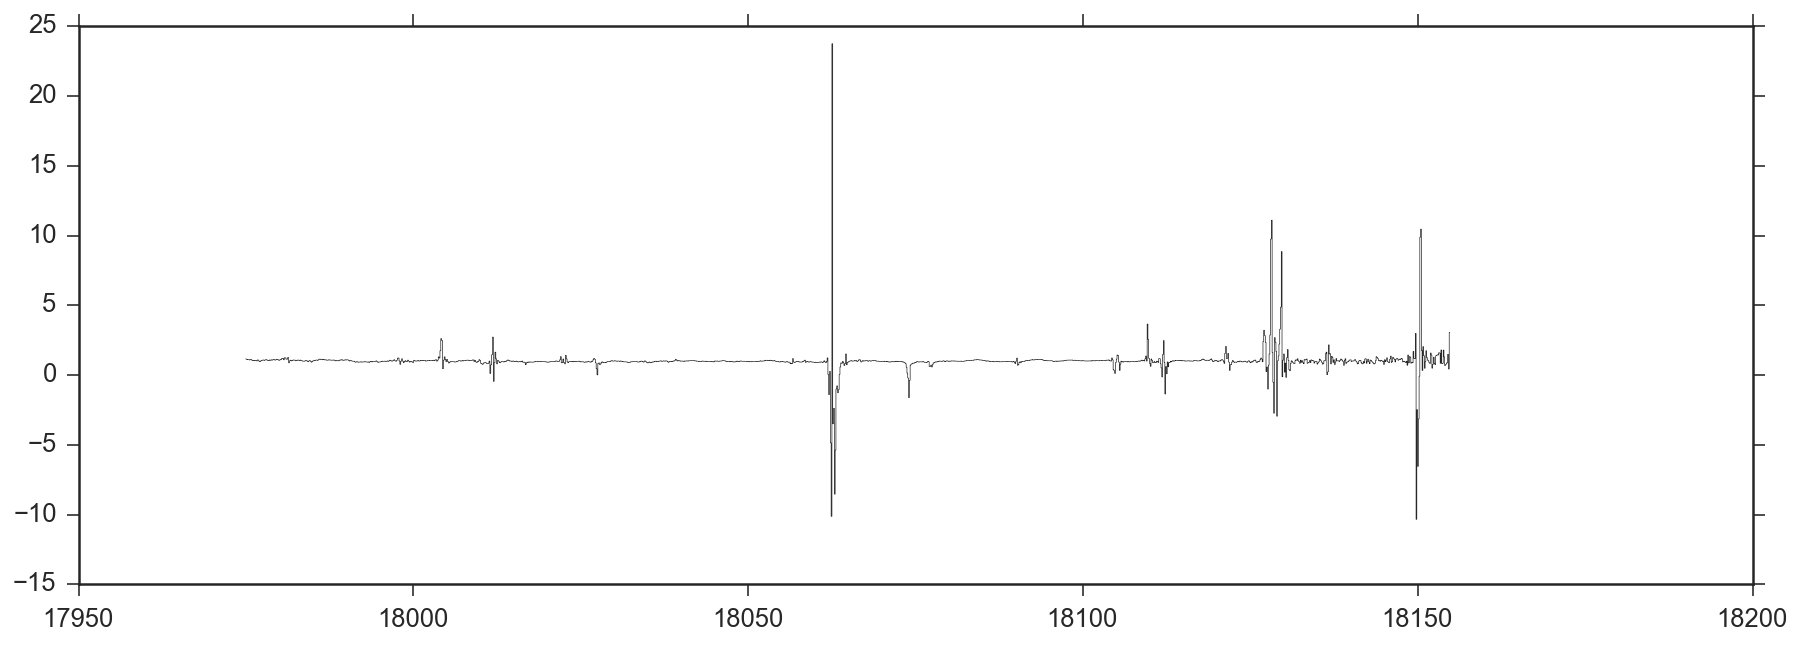

In [119]:
fig = plt.figure(figsize=(15, 5))
for m in ms:
    index = sf_dat.index[sf_dat.m_val == m]
    mdir = 'm{:03d}'.format(m)
    f = h5py.File('../data/reduced/LkCa4_IGRINS_{}.hdf5'.format(mdir), 'r')
    log_Omega = sf_dat.get_value(index.values[0], 'logO_50p')
    #plt.plot(f['wls'], f['fls'], 'r.', alpha=0.05)
    #plt.plot(f['wls'], f['fls']/(10**log_Omega), 'k.', alpha=0.05)
    
    len_wl = len(f['wls'])
    xs = np.arange(len_wl)
    coeff = [1]
    T = []
    for i in range(1, 4):
        # print("i = ", i)
        coeff = [0] + coeff
        Chtemp = Ch(coeff, domain=[0, len_wl - 1])
        Ttemp = Chtemp(xs)
        T += [Ttemp]

    T = np.array(T)

    cns = [sf_dat.c1_50p[index.values[0]], 
          sf_dat.c2_50p[index.values[0]],
          sf_dat.c3_50p[index.values[0]]]

    Tc = np.dot(T.T, cns)

    k = 1.0+ Tc

    plt.step(f['wls'], f['fls']/(10**log_Omega)/k, 'k', linewidth=0.3, alpha=1)
    
    wls = f['wls'][:]
    f.close()
    
    sf_out = '../sf/m{:03d}/config.yaml'.format(m)

    f2 = open(sf_out)
    config = yaml.load(f2)
    f2.close()


    config['data']['files'] = ['/Users/gully/GitHub/welter/data/reduced/LkCa4_IGRINS_m{:03d}.hdf5'.format(m)]
    config['grid']['hdf5_path'] = '/Users/gully/GitHub/welter/sf/m113/libraries/PHOENIX_IGRINS_m{:03d}.hdf5'.format(m)
    lb, ub = int(np.floor(wls[0])), int(np.ceil(wls[-1]))

    config['grid']['wl_range'] = [lb, ub]
    config['PCA']['path'] = '/home/gully/GitHub/welter/sf/m{:03d}/PHOENIX_IGRINS_H_PCA.hdf5'.format(m)
    config['name'] = 'LkCa4_m{:03d}'.format(m)
    config['Comments'] = 'LkCa4 single order: m = {}, autogenerated config file.'.format(m)
    config['data']['instruments'] =['IGRINS_K']
    config['Theta']['grid'] = [int(sf_dat.Teff_50p[index.values[0]]), 3.7, 0.0]
    config['Theta']['vsini'] = float(np.round(sf_dat.vi_50p[index.values[0]], decimals=1))
    config['Theta']['vz'] = float(np.round(sf_dat.vz_50p[index.values[0]], decimals=1))


    print("{:03d}: {:.0f}  -  {:.0f}   {}".format(m, wls[0], wls[-1], mdir))

    #os.makedirs(path_out, exist_ok=True)
    with open(sf_out, mode='w') as outfile:
        outfile.write(yaml.dump(config))
    
    os.chdir('../sf/{}'.format(mdir))
    os.system('star.py --generate')    

plt.plot([15000, 24000], [1.0, 1.0], 'k--')    
plt.ylim(0, 2)
#plt.xlim(21000, 22000)
plt.xlim(16300, 17300)

Tuesday, Dec. 22, 2015.  

I left off tyring to over plot the best fit models parameters with the full spectrum.  This will look very cool because we will have a long spectrum with a good model match, but with the ability to tune the nuissance parameters, like vsini, vz, etc.  Visual checking of this will help tell us what is working.

In [ ]:
fig = plt.figure(figsize=(15, 5))
for m in ###############:
    index = sf_dat.index[sf_dat.m_val == m]
    mdir = 'm{:03d}'.format(m)
    f = h5py.File('../data/reduced/LkCa4_IGRINS_{}.hdf5'.format(mdir), 'r')
    wls = f['wls'][:]
    f.close()
    
    sf_out = '../sf/m{:03d}/config.yaml'.format(m)

    f2 = open(sf_out)
    config = yaml.load(f2)
    f2.close()


    config['data']['files'] = ['/Users/gully/GitHub/welter/data/reduced/LkCa4_IGRINS_m{:03d}.hdf5'.format(m)]
    config['grid']['hdf5_path'] = '/Users/gully/GitHub/welter/sf/m113/libraries/PHOENIX_IGRINS_m{:03d}.hdf5'.format(m)
    lb, ub = int(np.floor(wls[0])), int(np.ceil(wls[-1]))

    config['grid']['wl_range'] = [lb, ub]
    config['PCA']['path'] = '/home/gully/GitHub/welter/sf/m{:03d}/PHOENIX_IGRINS_H_PCA.hdf5'.format(m)
    config['name'] = 'LkCa4_m{:03d}'.format(m)
    config['Comments'] = 'LkCa4 single order: m = {}, autogenerated config file.'.format(m)
    config['data']['instruments'] =['IGRINS_K']
    config['Theta']['grid'] = [int(sf_dat.Teff_50p[index.values[0]]), 3.7, 0.0]
    config['Theta']['vsini'] = float(np.round(sf_dat.vi_50p[index.values[0]], decimals=1))
    config['Theta']['vz'] = float(np.round(sf_dat.vz_50p[index.values[0]], decimals=1))


    print("{:03d}: {:.0f}  -  {:.0f}   {}".format(m, wls[0], wls[-1], mdir))

    #os.makedirs(path_out, exist_ok=True)
    with open(sf_out, mode='w') as outfile:
        outfile.write(yaml.dump(config))
    
    os.chdir('../sf/{}'.format(mdir))
    os.system('star.py --generate')    

plt.plot([15000, 24000], [1.0, 1.0], 'k--')    
plt.ylim(0, 2)
#plt.xlim(21000, 22000)
plt.xlim(16300, 17300)